<a href="https://colab.research.google.com/github/jnmelo13/Ciencia-de-dados/blob/main/fetch_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [ ]:
#Fazendo a importação dos pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")

In [ ]:
!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier

#Carregando Dados

In [ ]:
df = pd.read_csv('/content/housing.csv')

In [ ]:
#verificando tamanho do dataset
df.shape

(20640, 10)

In [ ]:
#Verificando tipo dos dados
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
#Verificando uma amostra dos dados
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Análise Exploratória

In [ ]:
# Criando um dicionário com a descrição de cada variável
df_dict = {"longitude":"Coordenada de longitude do endereço",
           "latitude": "Coordenada de latitude do endereço",
            "housingMedianAge": "Idade média das construções",
            "totalRooms": "Quantidade de comôdos em um quarteirão",
            "totalBedrooms": "Quantidade de quartos em um quarteirão",
            "population": "Número total de pessoas que residem em um quarteirão",
            "households": "Quantidade de famílias que residem em um quarteirão",
            "medianIncome": "Renda média das famílias dentro de um quarteirão (medida em dezenas de milhares de dólares americanos)",
            "medianHouseValue": "Preço médio das residências no quarteirão",
            "oceanProximity": "O quão próximo a o quarteirão é do mar"}

In [ ]:
df_dict['population']

'Número total de pessoas que residem em um quarteirão'

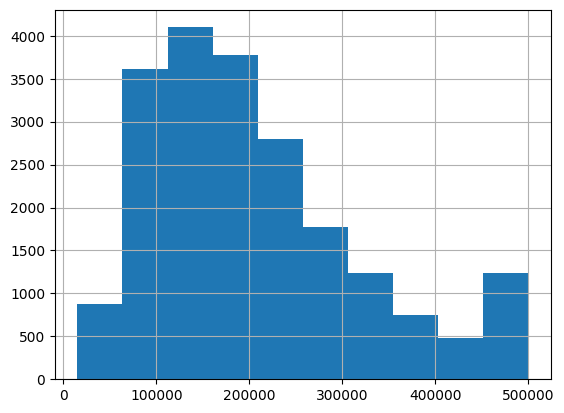

In [ ]:
#Histograma da variável alvo
df['median_house_value'].hist();

In [ ]:
#Resumo estatístico dos dados
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


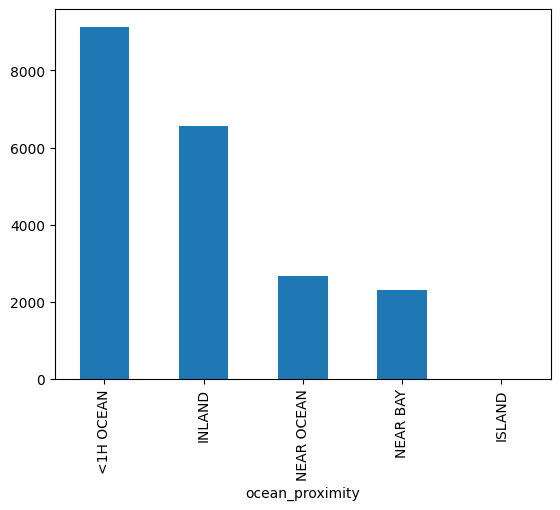

In [ ]:
#Dados da única variável categórica
df['ocean_proximity'].value_counts().plot(kind = 'bar');

In [ ]:
# Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(dataframe, alvo, atributos, n):

    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = dataframe, kind = "reg", height = 3)

    return

In [ ]:
alvo = ['median_house_value']
atributos = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

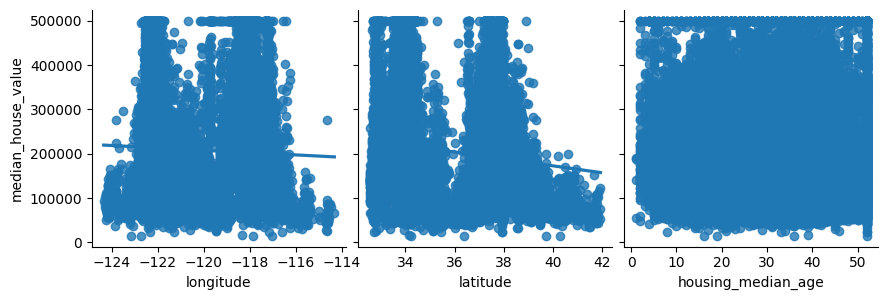

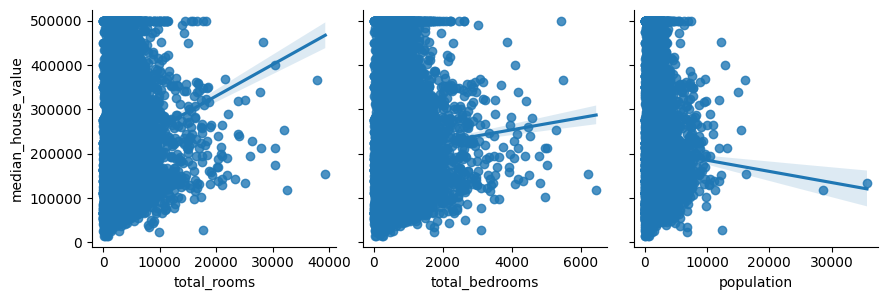

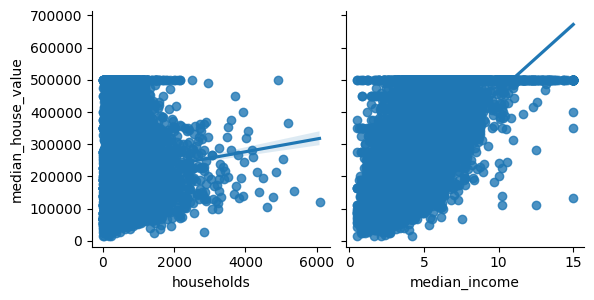

In [ ]:
get_pairs(df,alvo,atributos,3)

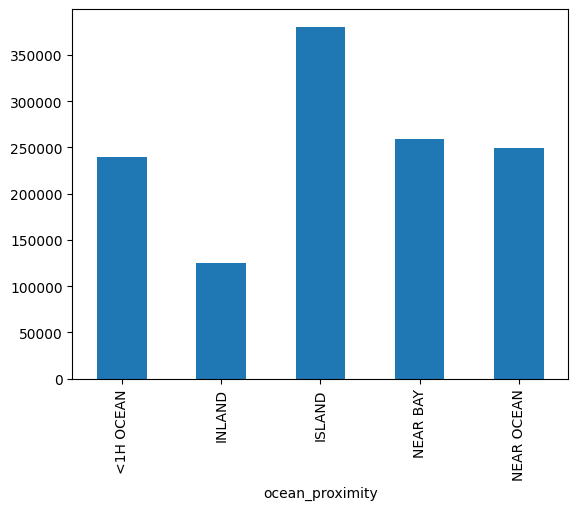

In [ ]:
#Visualizando a relação da variável categórica com a variável alvo
df.groupby('ocean_proximity')['median_house_value'].mean().plot(kind = 'bar');

In [ ]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [ ]:
df = pd.concat([df.drop('ocean_proximity',axis = 1),pd.get_dummies(df['ocean_proximity'])],axis = 1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


#Estudando Valores Ausentes

In [ ]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
<1H OCEAN             20640
INLAND                20640
ISLAND                20640
NEAR BAY              20640
NEAR OCEAN            20640
dtype: int64

In [ ]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
valores_ausentes

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [ ]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df.shape[0]
valores_ausentes_percent

total_bedrooms    0.010029
dtype: float64

In [ ]:
#Percentual de valores ausentes ~1%, portanto descartaremos da análise
df_novo = df.dropna()

In [ ]:
df_novo.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
<1H OCEAN             20433
INLAND                20433
ISLAND                20433
NEAR BAY              20433
NEAR OCEAN            20433
dtype: int64

#Estudando Outliers

In [ ]:
# Substituindo True e False por 1 e 0 respectivamente
df_novo = df_novo.replace({True: 1, False: 0})

In [ ]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = df_novo.quantile(0.25)
Q3 = df_novo.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df_novo < (Q1 - 1.5 * IQR)) | (df_novo > (Q3 + 1.5 * IQR))).sum()
outliers

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value    1064
<1H OCEAN                0
INLAND                   0
ISLAND                   5
NEAR BAY              2270
NEAR OCEAN            2628
dtype: int64

In [ ]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(df_novo)) * 100})
# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
total_rooms,1290,6.313317
total_bedrooms,1271,6.220330
population,1190,5.823912
households,1210,5.921793
median_income,670,3.279009
median_house_value,1064,5.207263
ISLAND,5,0.024470
NEAR BAY,2270,11.109480
NEAR OCEAN,2628,12.861547


#Análise Estatística dos Outliers

In [ ]:
#Criando dataframe sem os outliers
df_sem_outliers = df_novo[~((df_novo < (Q1 - 1.5 * IQR)) | (df_novo > (Q1 + 1.5 * IQR))).any(axis=1)]
df_sem_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0
870,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,3.5714,300000.0,1,0,0,0,0
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,1,0,0,0,0
892,-121.94,37.53,33.0,2095.0,342.0,941.0,304.0,5.7610,259600.0,1,0,0,0,0
893,-121.95,37.54,29.0,3517.0,645.0,1724.0,585.0,4.6641,248900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


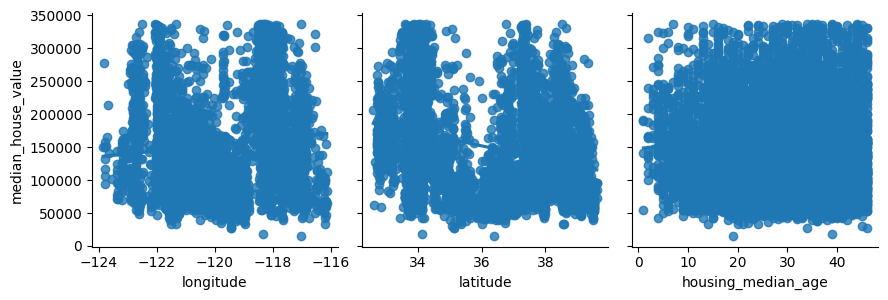

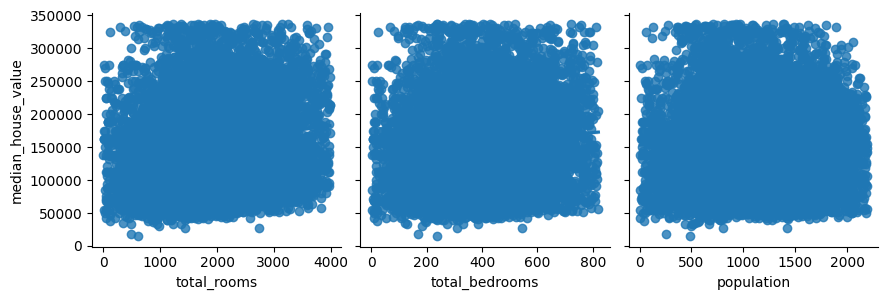

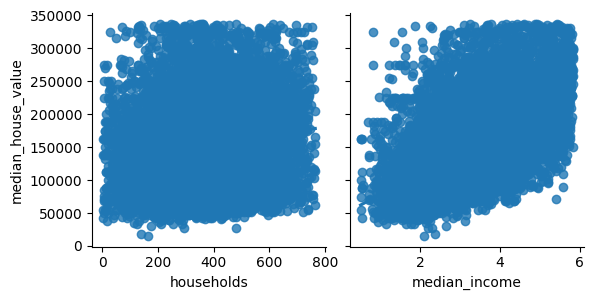

In [ ]:
get_pairs(df_sem_outliers,alvo,atributos,3)

Consideração Importante:
- Ao retirar os Outliers com o filtro de 1.5 IQR, a distribuição no gráfico de dispersão passou a não demostrar correlação entre as variáveis preditoras e a variável alvo. Portanto, não faz sentido seguir com o dataset expurgando os outliers

#Engenharia de Recursos

In [ ]:
#Criando novos atributos
df_novo['income_range'] = 1
df_novo['pop_size'] = 1
df_novo['bedrooms_per_household'] = df_novo['total_bedrooms']/df_novo['households']
df_novo['bedrooms_ratio'] = df_novo['total_bedrooms']/df_novo['total_rooms']

In [ ]:
# Criando os pontos de corte (cutoffs) com 2 percentis como referência
pontos_corte_population = [df_novo.population.quantile(0.33), df_novo.population.quantile(0.67)]
pontos_corte_median_income = [df_novo.median_income.quantile(0.33), df_novo.median_income.quantile(0.67)]

In [ ]:
pontos_corte_population

[903.0, 1505.0]

In [ ]:
# Definindo a faixa onde a variável terá o valor 2 e 3
df_novo.loc[(df_novo.population < pontos_corte_population[1]) & (df_novo.population > pontos_corte_population[0]), 'pop_size'] = 2
df_novo.loc[df_novo.population > pontos_corte_population[1], 'pop_size'] = 3
df_novo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_range,pop_size,bedrooms_per_household,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,1,1,1.023810,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,1,3,0.971880,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,1,1,1.073446,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,1,1,1.073059,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,1,1,1.081081,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,1,1,1.133333,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,1,1,1.315789,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,1,2,1.120092,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,1,1,1.171920,0.219892


In [ ]:
pontos_corte_median_income

[2.875, 4.263396]

In [ ]:
# Definindo a faixa onde a variável terá o valor 2 e 3
df_novo.loc[(df_novo.median_income < pontos_corte_median_income[1]) & (df_novo.median_income > pontos_corte_median_income[0]), 'income_range'] = 2
df_novo.loc[df_novo.median_income > pontos_corte_median_income[1], 'income_range'] = 3
df_novo

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_range,pop_size,bedrooms_per_household,bedrooms_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,3,1,1.023810,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,3,3,0.971880,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,3,1,1.073446,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,3,1,1.073059,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,2,1,1.081081,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,1,1,1.133333,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,1,1,1.315789,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,1,2,1.120092,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,1,1,1.171920,0.219892


In [ ]:
df_novo[df_novo['bedrooms_per_household'] == df_novo['bedrooms_per_household'].max()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_range,pop_size,bedrooms_per_household,bedrooms_ratio
1979,-120.08,38.8,34.0,1988.0,511.0,36.0,15.0,4.625,162500.0,0,1,0,0,0,3,1,34.066667,0.257042


#Análise de Multicolinearidade

Para desenvolver um bom modelo, desejamos que as variáveis preditoras tenham uma alta correlação com a variável alvo, mas não uma alta correlação entre si, pois isso fere uma das premissas da regressão.

OBS: Correlação não indica causalidade

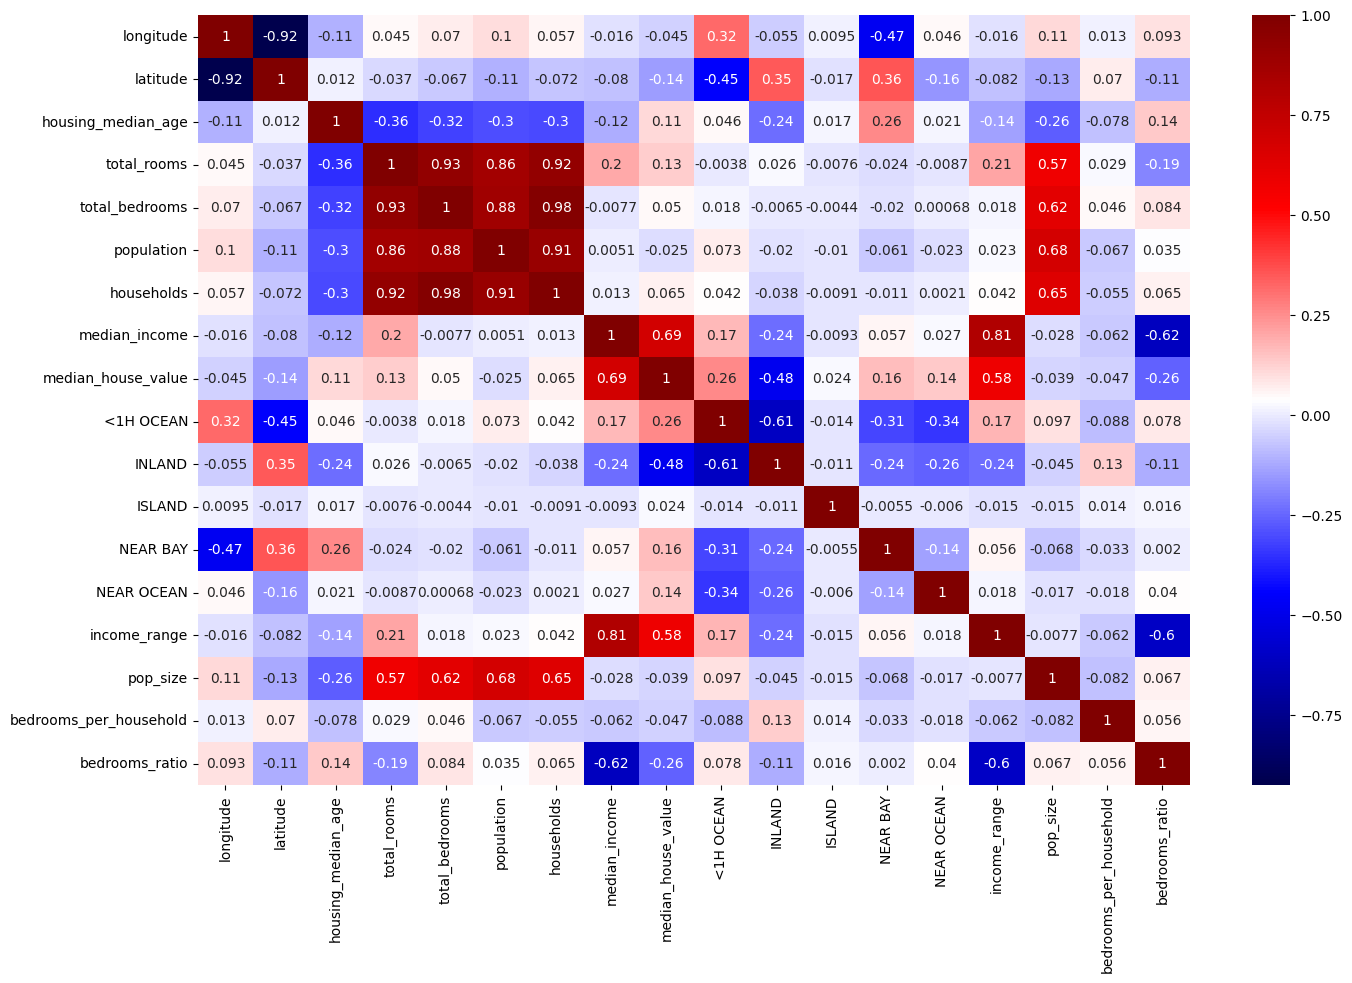

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df_novo.corr(),annot = True,cmap = 'seismic');

In [ ]:
#Esudando correlação com a variável alvo
corr_matrix = df_novo.corr(numeric_only=True)
corr_matrix[(corr_matrix["median_house_value"]>0.15) | (corr_matrix["median_house_value"]<-0.15)]["median_house_value"]

median_income         0.688355
median_house_value    1.000000
<1H OCEAN             0.257614
INLAND               -0.484787
NEAR BAY              0.160526
income_range          0.581375
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [ ]:
# Filtrando apenas as correlações significativas
dfCorr = df_novo.corr()
df_filtro_1 = dfCorr[((dfCorr >= 0.15) | (dfCorr <= -0.15)) & (dfCorr != 1.000)]
df_filtro_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_range,pop_size,bedrooms_per_household,bedrooms_ratio
longitude,NaN,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320831,NaN,NaN,-0.474714,NaN,NaN,NaN,NaN,NaN
latitude,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.446928,0.351084,NaN,0.358785,-0.161342,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,NaN,-0.360628,-0.320451,-0.295787,-0.302768,NaN,NaN,NaN,-0.236968,NaN,0.256149,NaN,NaN,-0.264686,NaN,NaN
total_rooms,NaN,NaN,-0.360628,NaN,0.930380,0.857281,0.918992,0.197882,NaN,NaN,NaN,NaN,NaN,NaN,0.209666,0.572423,NaN,-0.187900
total_bedrooms,NaN,NaN,-0.320451,0.930380,NaN,0.877747,0.979728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.618930,NaN,NaN
population,NaN,NaN,-0.295787,0.857281,0.877747,NaN,0.907186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680861,NaN,NaN
households,NaN,NaN,-0.302768,0.918992,0.979728,0.907186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.646228,NaN,NaN
median_income,NaN,NaN,NaN,0.197882,NaN,NaN,NaN,NaN,0.688355,0.168715,-0.237536,NaN,NaN,NaN,0.813451,NaN,NaN,-0.615661
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.688355,NaN,0.257614,-0.484787,NaN,0.160526,NaN,0.581375,NaN,NaN,-0.255880
<1H OCEAN,0.320831,-0.446928,NaN,NaN,NaN,NaN,NaN,0.168715,0.257614,NaN,-0.607778,NaN,-0.314721,-0.342018,0.173981,NaN,NaN,NaN


As variáveis median_income, income_range,bedrooms_ratio,<1H OCEAN e INLAND, NEAR BAY são as que apresentam correlação mais significativa com a variável alvo

Para garantir que não teremos problemas de multicolinearidade, vamos agora checar as correlações >=  65% e escolher uma das duas variáveis nos casos que forem encontrados

In [ ]:
# Filtrando a matriz de correlação
dfCorr = df_novo.corr()
df_filtro_2 = dfCorr[((dfCorr >= 0.65) | (dfCorr <= -0.65)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('median_house_value', axis=1)
df_filtro_2 = df_filtro_2.drop('median_house_value', axis=0)
df_filtro_2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_range,pop_size,bedrooms_per_household,bedrooms_ratio
longitude,NaN,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.924616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,NaN,0.930380,0.857281,0.918992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.930380,NaN,0.877747,0.979728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,0.857281,0.877747,NaN,0.907186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680861,NaN,NaN
households,NaN,NaN,NaN,0.918992,0.979728,0.907186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813451,NaN,NaN,NaN
<1H OCEAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Explicando Decisão

**Primeiro Filtro - Correlação com a variável alvo**

As variáveis  median_income, income_range,bedrooms_ratio, <1H OCEAN, INLAND e NEAR BAY são as que atendem ao critério utilizado

**Segundo Filtro - Multicolinearidade**

Entre as variáveis que apresentaram alta correlação entre si (critério de 0.65), foram escolhidas as que apresentaram maior correlação com a variável alvo. São elas: median_income,<1H OCEAN, INLAND e NEAR BAY

In [ ]:
# Preparando o novo dataset
df_novo_final = pd.DataFrame({'median_house_value': df_novo['median_house_value'],
                              'median_income': df_novo['median_income'],
                              'next_ocean': df_novo['<1H OCEAN'],
                              'inland': df_novo['INLAND'],
                              'near_bay': df_novo['NEAR BAY'],
                              'bedrooms_ratio':df_novo['bedrooms_ratio'],})

In [ ]:
df_novo_final.sample(10)

,median_house_value,median_income,next_ocean,inland,near_bay,bedrooms_ratio
3786,194100.0,2.3851,1,0,0,0.244009
2068,81300.0,2.6146,0,1,0,0.177481
12006,220800.0,5.1695,0,1,0,0.178941
14149,111300.0,1.4254,0,0,0,0.259966
5842,361700.0,3.0625,1,0,0,0.205801
10957,187200.0,2.8342,1,0,0,0.224035
5077,97200.0,1.9125,1,0,0,0.245467
3264,92600.0,3.8333,1,0,0,0.175774
18197,239400.0,5.7910,1,0,0,0.185275
14791,135600.0,2.5988,0,0,0,0.217764


In [ ]:
#Checando valores ausentes
df_novo_final.count()

median_house_value    20433
median_income         20433
next_ocean            20433
inland                20433
near_bay              20433
bedrooms_ratio        20433
dtype: int64

In [ ]:
df_novo_final.dtypes

median_house_value    float64
median_income         float64
next_ocean              int64
inland                  int64
near_bay                int64
bedrooms_ratio        float64
dtype: object

#Modelagem Estatística

In [ ]:
# Variável alvo x Variáveis Preditoras
formula = 'median_house_value ~ median_income + next_ocean + inland + near_bay + bedrooms_ratio'

In [ ]:
# Cria e treina o modelo
modelo_v1 = ols(formula, data = df_novo_final).fit()

In [ ]:
# Coeficiente de Determinação
print(f"R-squared: {modelo_v1.rsquared}")

R-squared: 0.599635427334875


In [ ]:
# Coeficientes
print(f"Coeficientes:\n{modelo_v1.params}")

Coeficientes:
Intercept          11510.902534
median_income      43196.849612
next_ocean        -18519.026792
inland            -85421.565473
near_bay            4297.384841
bedrooms_ratio    295715.399792
dtype: float64


In [ ]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     6119.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:15:49   Log-Likelihood:            -2.5782e+05
No. Observations:               20433   AIC:                         5.156e+05
Df Residuals:                   20427   BIC:                         5.157e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.151e+04   4029.671      2.857      0.004    3612.425    1.94e+04
median_income    4.32e+04    371.906    116.150      0.000    4.25e+04    4.39e+04
next_ocean     -1.852e+04   1619.650    -11.434      0.000   -2.17e+04   -1.53e+04
inland         -8.542e+04   1745.085    -48.950      0.000   -8.88e+04    -8.2e+04
near_bay        4297.3848   2092.964      2.053      0.040     195.007    8399.762
bedrooms_ratio  2.957e+05   1.19e+04     24.836      0.000    2.72e+05    3.19e+05
==============================================================================
Omnibus:                     4478.775   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12101.211
Skew:                           1.175   Prob(JB):                         0.00
Kurtosis:                       5.949   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Padronização
scaler = StandardScaler()
scaler.fit(df_novo_final[['median_income']])

StandardScaler()

In [ ]:
df_novo_final['median_income_padronizada'] = scaler.transform(df_novo_final[['median_income']])

In [ ]:
# Variável alvo x Variáveis Preditoras
formula = 'median_house_value ~ median_income_padronizada + next_ocean + inland + bedrooms_ratio'
# Cria e treina o modelo
modelo_v2 = ols(formula, data = df_novo_final).fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     7646.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:15:49   Log-Likelihood:            -2.5782e+05
No. Observations:               20433   AIC:                         5.156e+05
Df Residuals:                   20428   BIC:                         5.157e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.808e+05   2830.467     63.873      0.000    1.75e+05    1.86e+05
median_income_padronizada  8.205e+04    706.371    116.162      0.000    8.07e+04    8.34e+04
next_ocean                -2.051e+04   1297.750    -15.804      0.000   -2.31e+04    -1.8e+04
inland                    -8.741e+04   1451.912    -60.203      0.000   -9.03e+04   -8.46e+04
bedrooms_ratio             2.954e+05   1.19e+04     24.809      0.000    2.72e+05    3.19e+05
==============================================================================
Omnibus:                     4487.205   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12156.059
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                       5.958   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Conclusão da modelagem estatística

As variáveis median_income,median_income,next_ocean,inland, near_bay e bedrooms_ratio 60% das variação da variável alvo median_house_value

#Trabalhando com o df sem outliers - Não faz sentido

##Engenharia de recursos

In [ ]:
df_sem_outliers['bedrooms_ratio'] = df_sem_outliers['total_bedrooms']/df_novo['total_rooms']

In [ ]:
df_sem_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0,0.166993
870,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,3.5714,300000.0,1,0,0,0,0,0.270435
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,1,0,0,0,0,0.176501
892,-121.94,37.53,33.0,2095.0,342.0,941.0,304.0,5.7610,259600.0,1,0,0,0,0,0.163246
893,-121.95,37.54,29.0,3517.0,645.0,1724.0,585.0,4.6641,248900.0,1,0,0,0,0,0.183395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,0.219892


##Análise de Multicolinearidade

In [ ]:
df_sem_outliers[df_sem_outliers['ISLAND']==0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,1,0,0,0,0,0.166993
870,-121.93,37.49,5.0,1150.0,311.0,648.0,245.0,3.5714,300000.0,1,0,0,0,0,0.270435
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,1,0,0,0,0,0.176501
892,-121.94,37.53,33.0,2095.0,342.0,941.0,304.0,5.7610,259600.0,1,0,0,0,0,0.163246
893,-121.95,37.54,29.0,3517.0,645.0,1724.0,585.0,4.6641,248900.0,1,0,0,0,0,0.183395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,0.219892


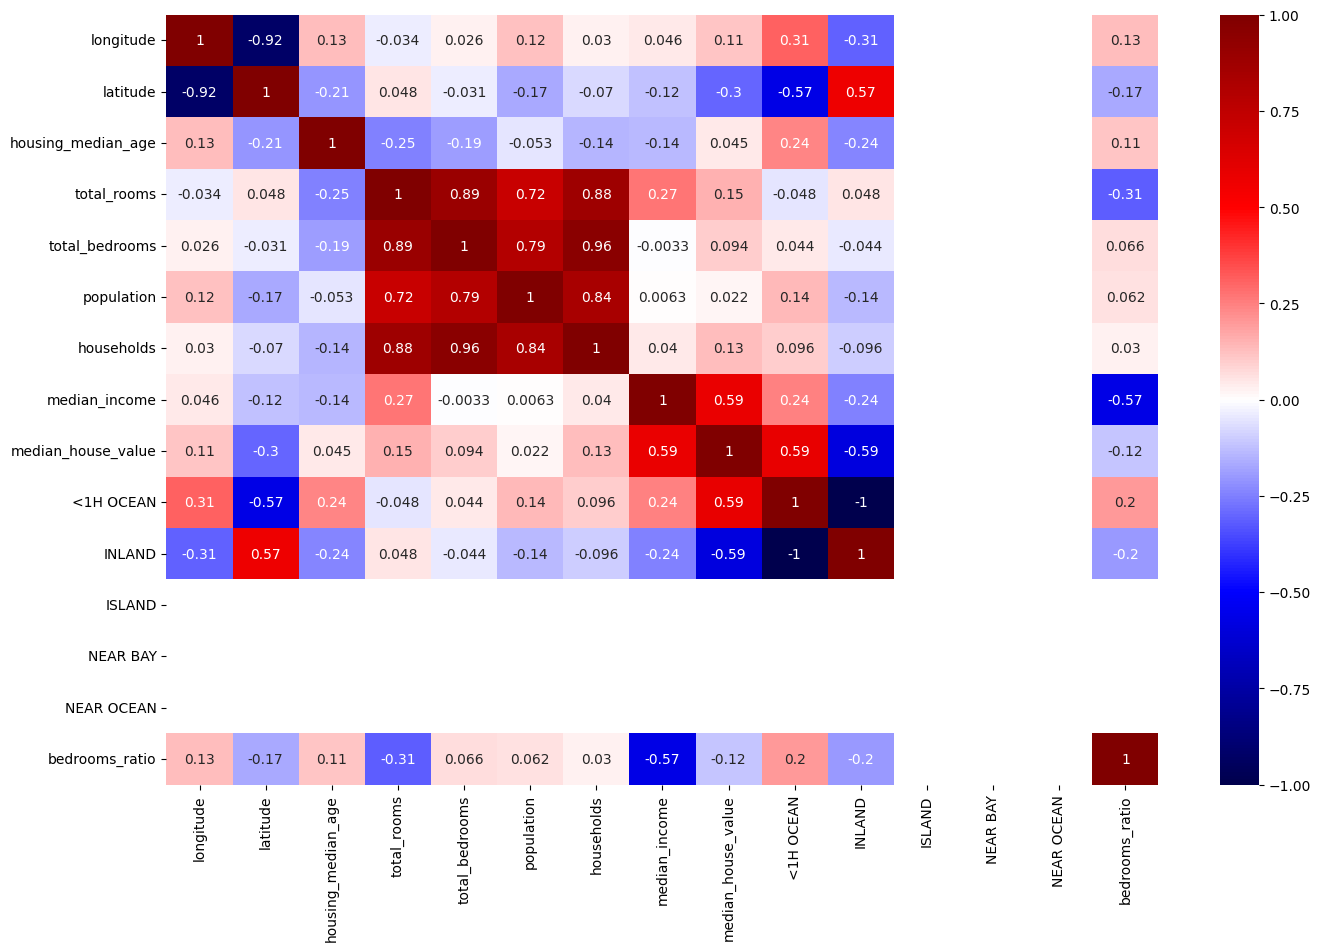

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df_sem_outliers.corr(),annot = True,cmap = 'seismic');

In [ ]:
#Esudando correlação com a variável alvo
corr_matrix = df_sem_outliers.corr(numeric_only=True)
corr_matrix[(corr_matrix["median_house_value"]>0.15) | (corr_matrix["median_house_value"]<-0.15)]["median_house_value"]

latitude             -0.297773
total_rooms           0.152665
median_income         0.585157
median_house_value    1.000000
<1H OCEAN             0.586251
INLAND               -0.586251
Name: median_house_value, dtype: float64

- As variáveis latitude, total_rooms, median_income, median_house_value, 1H OCEAN e INLAND são as que possuem maior correlação com a variável dependente
- A fim de evitar multicolinearidade, será feito um corte no valor de 0.65 na correlação entre variáveis independentes e escolhida aquela que apresentar maior correlação com a variável dependente

In [ ]:
# Filtrando a matriz de correlação
dfCorr = df_sem_outliers.corr()
df_filtro_2 = dfCorr[((dfCorr >= 0.65) | (dfCorr <= -0.65)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('median_house_value', axis=1)
df_filtro_2 = df_filtro_2.drop('median_house_value', axis=0)
df_filtro_2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio
longitude,NaN,-0.92354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.92354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,NaN,0.893245,0.715822,0.875029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,0.893245,NaN,0.789784,0.958631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,NaN,NaN,NaN,0.715822,0.789784,NaN,0.843716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
households,NaN,NaN,NaN,0.875029,0.958631,0.843716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
<1H OCEAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
INLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN


- Foi retirada a variável INLAND, pois apresenta alta correlação com <1H OCEAN.

In [ ]:
# Preparando o novo dataset
df_sem_outliers_final = pd.DataFrame({'median_house_value': df_sem_outliers['median_house_value'],
                              'median_income': df_sem_outliers['median_income'],
                              'next_ocean': df_sem_outliers['<1H OCEAN'],
                              'latitude': df_sem_outliers['latitude'],
                              'total_rooms':df_sem_outliers['total_rooms'],})

In [ ]:
df_sem_outliers_final.count()

median_house_value    9011
median_income         9011
next_ocean            9011
latitude              9011
total_rooms           9011
dtype: int64

In [ ]:
# Variável alvo x Variáveis Preditoras
formula = 'median_house_value ~ median_income + next_ocean + latitude + total_rooms'

In [ ]:
# Cria e treina o modelo
modelo_v1 = ols(formula, data = df_sem_outliers_final).fit()
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     2815.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:15:52   Log-Likelihood:            -1.0924e+05
No. Observations:                9011   AIC:                         2.185e+05
Df Residuals:                    9006   BIC:                         2.185e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.978e+04   1.07e+04     -1.848      0.065   -4.08e+04    1197.957
median_income  2.613e+04    435.366     60.027      0.000    2.53e+04     2.7e+04
next_ocean     6.703e+04   1174.212     57.086      0.000    6.47e+04    6.93e+04
latitude       1287.0304    288.870      4.455      0.000     720.780    1853.280
total_rooms       4.0887      0.593      6.900      0.000       2.927       5.250
==============================================================================
Omnibus:                     1392.908   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2410.338
Skew:                           1.012   Prob(JB):                         0.00
Kurtosis:                       4.523   Cond. No.                     4.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Machine Learning

##Pré-Processamento dos Dados

In [ ]:
#Variável alvo
y = df_novo['median_house_value']
#Variáveis preditoras
X = df_novo.drop(columns = 'median_house_value')

In [ ]:
#Dividindo entre base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
print('Treinamento: ',X_train.shape,y_train.shape)
print('Teste: ',X_test.shape,y_test.shape)

Treinamento:  (16346, 17) (16346,)
Teste:  (4087, 17) (4087,)


In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_test)

In [ ]:
#Padronizando dados devido a amplitude dos valores na amostra
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

print('Treinamento: ',X_test_scaled.shape)
print('Teste: ',X_train_scaled.shape)

Treinamento:  (4087, 17)
Teste:  (16346, 17)


##Modelagem Preditiva

### V1 - Modelo Benchmark

In [ ]:
#Chamando Modelo
model_v1 = LinearRegression()

#Treinando o Modelo
model_v1.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
# O que o modelo aprendeu:
print("Coeficientes: \n", model_v1.coef_)

Coeficientes: 
 [-54941.38897037 -55458.74616927  13945.142983     5198.87354212
   7246.67726636 -41021.92858265  38022.11292645  75536.96961244
   5565.34216284 -10447.08027471   4874.47613717   1419.40794045
   4820.77432353   6563.07592856  -4350.94852536   8966.82800637
  15564.07606793]


In [ ]:
# Previsões com dados de treino
y_pred_train_v1 = model_v1.predict(X_train_scaled)

In [ ]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v1))
print('Mean Squared Error (R²):', metrics.mean_squared_error(y_train, y_pred_train_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v1)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v1))

Mean Absolute Error: 48963.28853452004
Mean Squared Error (R²): 4560890205.639654
Root Mean Squared Error: 67534.36314676888
R2 Score: 0.6554406519106317


In [ ]:
#Avaliação do modelo
y_pred_test_v1 = model_v1.predict(X_test_scaled)

In [ ]:
y_pred_test_v1

array([219789.1702996 , 151971.06887995, 202476.25339604, ...,
       102337.10260262, 134685.79374731, 157074.46237926])

In [ ]:
# Dataframe com as previsões e valores reais
df_previsoes = pd.DataFrame({'Valor_Real': y_test, 'Valor_Previsto': y_pred_test_v1})

In [ ]:
df_previsoes.head()

,Valor_Real,Valor_Previsto
14416,245800.0,219789.170300
16383,137900.0,151971.068880
7731,218200.0,202476.253396
1410,220800.0,183352.147352
1335,170500.0,201980.402143


In [ ]:
# Função para criar gráfico de dispersão
def grafico_dispersao(x, y, title, xlabel, ylabel):

    # Figura e subplots
    fig, ax = plt.subplots(figsize = (10, 6))

    # Scatter
    ax.scatter(x, y, color = "blue", alpha = 0.3)

    # Labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return

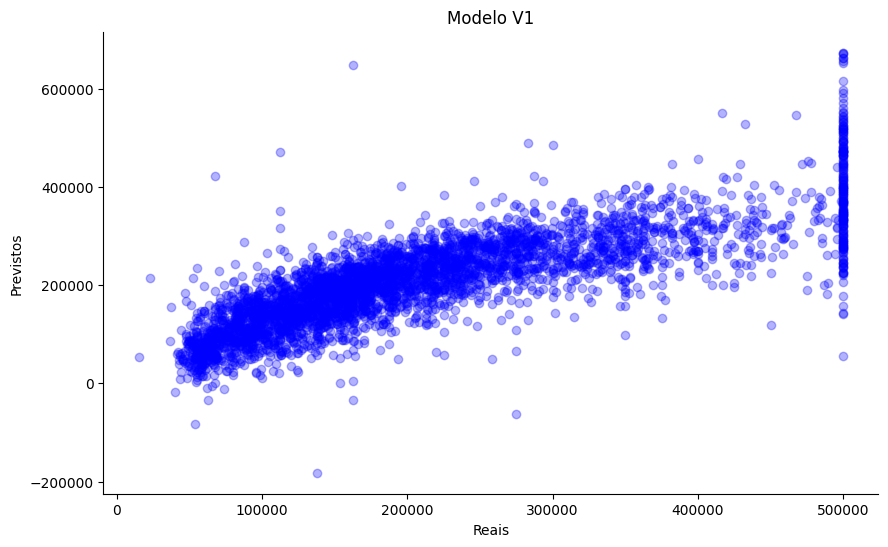

In [ ]:
grafico_dispersao(y_test, y_pred_test_v1, 'Modelo V1', 'Reais', 'Previstos')

In [ ]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v1)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v1))

Mean Absolute Error: 49999.063650594515
Mean Squared Error: 4786256289.888499
Root Mean Squared Error: 69182.77451713324
R2 Score: 0.6500041670548591


###V2 - Ridge (L2)

In [ ]:
model_v2 = Ridge(alpha = 1.0)

In [ ]:
model_v2 = model_v2.fit(X_train_scaled, y_train)

In [ ]:
y_pred_train_v2 = model_v2.predict(X_train_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v2)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v2))

Mean Absolute Error: 48962.91748085359
Mean Squared Error: 4560891374.376157
Root Mean Squared Error: 67534.3717996707
R2 Score: 0.6554405636166651


In [ ]:
#Avaliação do modelo
y_pred_test_v2 = model_v2.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v2)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v2))

Mean Absolute Error: 49998.444466214256
Mean Squared Error: 4786118206.009651
Root Mean Squared Error: 69181.77654563123
R2 Score: 0.6500142644627843


###V3 - Random Forest

In [ ]:
model_v3 = RandomForestRegressor()

In [ ]:
model_v3 = model_v3.fit(X_train_scaled, y_train)

In [ ]:
model_v3

100

In [ ]:
y_pred_train_v3 = model_v3.predict(X_train_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v3)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v3))

Mean Absolute Error: 11914.559971246788
Mean Squared Error: 337824791.8753289
Root Mean Squared Error: 18380.010660370383
R2 Score: 0.9744785152001559


In [ ]:
#Avaliação do modelo
y_pred_test_v3 = model_v3.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v3)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v3))

Mean Absolute Error: 32611.193633471983
Mean Squared Error: 2480286068.786545
Root Mean Squared Error: 49802.470508866776
R2 Score: 0.8186286450182134


###V4 XGBoost

In [ ]:
model_v4= LogisticRegression()

In [ ]:
model_v4 = model_v4.fit(X_train_scaled, y_train)

In [ ]:
y_pred_train_v4 = model_v4.predict(X_train_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v4)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v4))

Mean Absolute Error: 99699.34051144011
Mean Squared Error: 21175174670.299767
Root Mean Squared Error: 145516.92228156753
R2 Score: -0.5997105940097349


In [ ]:
y_pred_test_v4 = model_v4.predict(X_test_scaled)

###V5 - Random Forest (Otimização de Hiperparametros)

In [ ]:
#Importando GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definição do espaço de hiperparâmetros para otimização
parametros = {'n_estimators': [30, 50, 70, 90, 95, 100],
              'max_depth': [5,7,10,15,17,19]}

In [ ]:
# Configuração do GridSearchCV
grid_search = GridSearchCV(estimator = model_v3,
                               param_grid = parametros,
                               cv = 5,
                               scoring = 'neg_mean_squared_error',
                               verbose = 1)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 10, 15, 17],
                         'n_estimators': [30, 50, 70, 90, 95, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results.head()

In [ ]:
#Melhor Modelo definido pelo Grid
print(f'Melhores parametros {grid_search.best_params_}')
model_v5 = grid_search.best_estimator_

Melhores parametros {'max_depth': 17, 'n_estimators': 95}


In [ ]:
y_pred_train_v5 = model_v5.predict(X_train_scaled)

In [ ]:
# Métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v5)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v5))

Mean Absolute Error: 15004.08947647032
Mean Squared Error: 473366624.182708
Root Mean Squared Error: 21756.990237225094
R2 Score: 0.9642388024964998


In [ ]:
y_pred_test_v5 = model_v5.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v5))

Mean Absolute Error: 32971.473696808185
Mean Squared Error: 2510139619.9617944
Root Mean Squared Error: 50101.29359569266
R2 Score: 0.8164455988382532


In [ ]:
#Testando com novos parametros
parametros = {'n_estimators': [95, 110,120,130],
              'max_depth': [17,21,25,30]}
# Configuração do GridSearchCV
grid_search_v2 = GridSearchCV(estimator = model_v3,
                               param_grid = parametros,
                               cv = 5,
                               scoring = 'neg_mean_squared_error',
                               verbose = 1)

In [ ]:
grid_search_v2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [17, 21, 25, 30],
                         'n_estimators': [95, 110, 120, 130]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
#Melhor Modelo definido pelo Grid
print(f'Melhores parametros {grid_search_v2.best_params_}')
model_v5_2 = grid_search_v2.best_estimator_

Melhores parametros {'max_depth': 30, 'n_estimators': 120}


In [ ]:
y_pred_train_v5_2 = model_v5_2.predict(X_train_scaled)

In [ ]:
# Métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v5_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v5_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v5_2)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v5_2))

Mean Absolute Error: 11822.313037322436
Mean Squared Error: 334024172.09489036
Root Mean Squared Error: 18276.328189625245
R2 Score: 0.9747656387692049


In [ ]:
y_pred_test_v5_2 = model_v5_2.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v5_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v5_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5_2)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v5_2))

Mean Absolute Error: 32506.563559055103
Mean Squared Error: 2456758811.4798803
Root Mean Squared Error: 49565.70196698399
R2 Score: 0.8203490798464438


###V6 - Árvore de decisão

In [ ]:
model_v6 = DecisionTreeClassifier()

In [ ]:
model_v6 = model_v6.fit(X_train_scaled, y_train)

In [ ]:
y_pred_train_v6 = model_v6.predict(X_train_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train_v6))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train_v6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_v6)))
print('R2 Score:', metrics.r2_score(y_train, y_pred_train_v6))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R2 Score: 1.0


In [ ]:
y_pred_test_v6 = model_v6.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_v6))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_v6))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v6)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_test_v6))

Mean Absolute Error: 57076.48005872278
Mean Squared Error: 7255605334.762418
Root Mean Squared Error: 85179.84112900433
R2 Score: 0.46943258387015074


###Seleção do Modelo

In [ ]:
#Compilando dados em um dataframe
# Preparando o novo dataset
resumo_resultado = pd.DataFrame({'modelo': ['LinearRegression','Ridge (L2)', 'RandomForest', 'XGBoost', 'RandomForestHyperParam_1', 'RandomForestHyperParam_2'],
                              'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v1)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v2)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v3)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v4)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5)),np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_v5_2))],
                              'R2 Score': [ metrics.r2_score(y_test, y_pred_test_v1),metrics.r2_score(y_test, y_pred_test_v2),metrics.r2_score(y_test, y_pred_test_v3),metrics.r2_score(y_test, y_pred_test_v4),metrics.r2_score(y_test, y_pred_test_v5),metrics.r2_score(y_test, y_pred_test_v5_2)],
                              })
resumo_resultado.sort_values(by = 'RMSE')

,modelo,RMSE,R2 Score
5,RandomForestHyperParam_2,49565.701967,0.820349
2,RandomForest,49802.470509,0.818629
4,RandomForestHyperParam_1,50101.293596,0.816446
1,Ridge (L2),69181.776546,0.650014
0,LinearRegression,69182.774517,0.650004
3,XGBoost,144589.132538,-0.528756


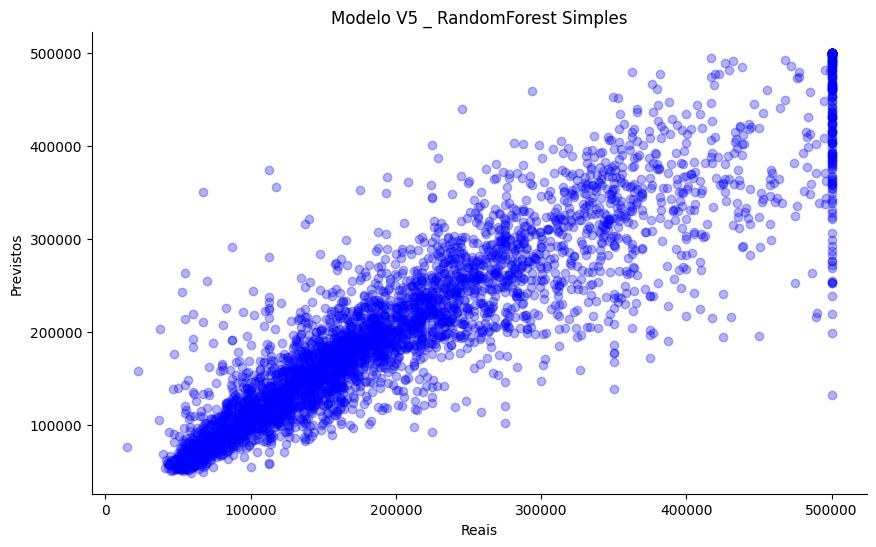

In [ ]:
#Plotando dispersao para RandomForest
grafico_dispersao(y_test, y_pred_test_v5, 'Modelo V5 _ RandomForest Simples', 'Reais', 'Previstos')

###Decisão

Apesar do melhor resultado ser o apresentado pelo modelo RandomForest com ajuste de hiperparâmetros, no entanto a diferença é extramamente baixa quando comparado com o RandomForest simples. Portanto, a decisão é seguir com o modelo mais simples do RandomForest, o qual vai demandar menos recurso computacional e é mais simples de se explicar.